# Image Filter

In [1]:
import numpy as np
from PIL import Image # pip install pillow

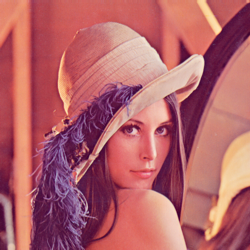

In [2]:
img = Image.open(open("lena_std.tif", "rb")).resize((250, 250))
img

In [3]:
img_array = np.array(img)
img_array.shape

(250, 250, 3)

In [4]:
img_array

array([[[226, 137, 126],
        [223, 137, 129],
        [226, 134, 119],
        ...,
        [231, 147, 129],
        [232, 148, 123],
        [212, 118, 102]],

       [[226, 137, 126],
        [223, 137, 130],
        [226, 134, 119],
        ...,
        [232, 149, 130],
        [234, 151, 125],
        [215, 121, 103]],

       [[227, 138, 124],
        [224, 135, 121],
        [226, 134, 118],
        ...,
        [221, 131, 117],
        [212, 119, 105],
        [177,  84,  89]],

       ...,

       [[ 90,  28,  61],
        [ 92,  29,  62],
        [ 96,  29,  63],
        ...,
        [139,  53,  73],
        [157,  62,  74],
        [162,  60,  75]],

       [[ 86,  22,  60],
        [ 92,  26,  61],
        [ 94,  26,  62],
        ...,
        [153,  64,  81],
        [171,  69,  81],
        [171,  66,  79]],

       [[ 83,  22,  57],
        [ 94,  29,  62],
        [ 95,  25,  61],
        ...,
        [166,  69,  84],
        [178,  69,  80],
        [183,  72,  81]]

## Config

In [5]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])
stride = (1, 1)
padding = 1

## NDImage

In [6]:
import scipy.ndimage as ndi

conv_arrays = []
for z in range(3):
    values = ndi.convolve(img_array[:, :, z], kernel, mode="constant", cval=0)
    conv_arrays.append(values)

conv_array = np.stack(conv_arrays, axis=2)
conv_array.shape

(250, 250, 3)

In [194]:
conv_array = np.where(conv_array > 255, 255, conv_array)
conv_array = np.where(conv_array < 0, 0, conv_array)
conv_array.min(), conv_array.max()

(0.0, 255.0)

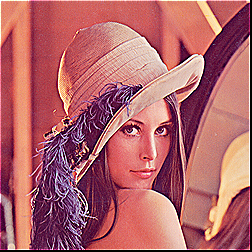

In [195]:
PIL_image = Image.fromarray(conv_array.astype('uint8'), 'RGB')
PIL_image

## Manual Convolution

### Padding the Image

In [7]:
img_array_pad = np.array([])

img_array_pads = []
for z in range(3):
    values = np.pad(array=img_array[:, :, z], pad_width=padding, mode="constant", constant_values=0)
    img_array_pads.append(values)

img_array_pad = np.stack(img_array_pads, axis=2)
img_array_pad.shape

(252, 252, 3)

### Convolution Rolling

In [8]:
conv_array = np.zeros(img_array_pad.shape)

(row , col, _) = img_array_pad.shape 
(i_margin, j_margin) = kernel.shape

for z in range(3):
    for i in range(0, row - 2, stride[1]):
        for j in range(0, col - 2, stride[0]):
            value = np.sum(np.multiply(img_array_pad[i:i+i_margin, j:j+j_margin, z], kernel))
            conv_array[i, j, z] = value

conv_array.shape

(252, 252, 3)

In [9]:
conv_array = np.where(conv_array > 255, 255, conv_array)
conv_array = np.where(conv_array < 0, 0, conv_array)
conv_array.min(), conv_array.max()

(0.0, 255.0)

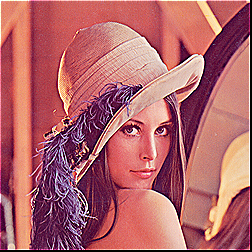

In [10]:
PIL_image = Image.fromarray(conv_array.astype('uint8'), 'RGB')
PIL_image

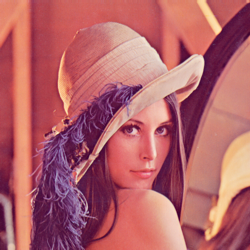

In [11]:
img

## OpenCV

In [193]:
import cv2

# img_array = cv2.imread('lena_std.tif')
# b, g, r = cv2.split(img_array)

r, g, b = cv2.split(img_array)
b_filtered = cv2.filter2D(b, -1, kernel)
g_filtered = cv2.filter2D(g, -1, kernel)
r_filtered = cv2.filter2D(r, -1, kernel)
filtered_img = cv2.merge([b_filtered, g_filtered, r_filtered])
cv2.imshow('Filtered Color Image', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()